## ECCO solution - Melville Bay

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [112]:
theta = xr.open_dataset('../../../data/ECCO_melville/W_Greenland_THETA_201501.nc')

In [123]:
theta_ds = theta.set_coords('longitude').set_coords('latitude').isel(time=0)

In [124]:
salt = xr.open_dataset('../../../data/ECCO_melville/W_Greenland_SALT_201501.nc')
salt_ds = salt.set_coords('longitude').set_coords('latitude').isel(time=0)

In [126]:
theta_250m = theta_ds.sel(depth=250, method='nearest')
salt_250m  = salt_ds.sel(depth=250, method='nearest')

In [132]:
depth_mask = salt_ds.where(salt_ds.SALT==0,drop=True).SALT

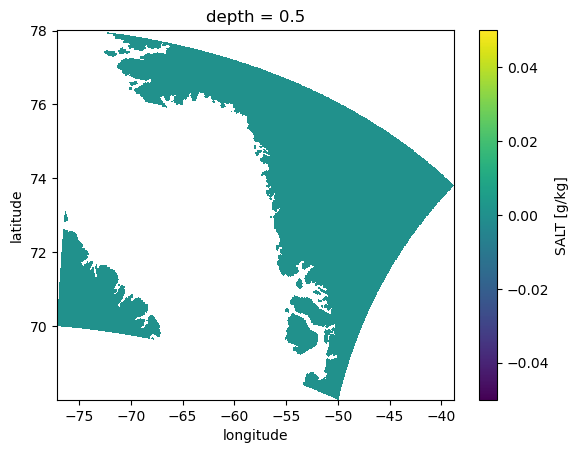

In [137]:
depth_mask.isel(depth=0).plot(y='latitude',x='longitude')

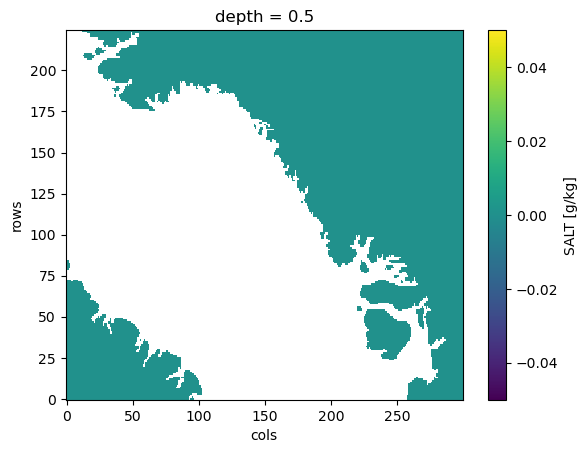

In [90]:
salt_mask.isel(depth=0,time=0).plot()

In [107]:
theta_250m.longitude.isel(cols=0).values

array([-77.077095, -77.07019 , -77.06325 , -77.05627 , -77.04925 ,
       -77.0422  , -77.03511 , -77.027985, -77.02082 , -77.01362 ,
       -77.006386, -76.999115, -76.9918  , -76.98445 , -76.977066,
       -76.96965 , -76.96219 , -76.95469 , -76.94716 , -76.93958 ,
       -76.93197 , -76.924324, -76.91663 , -76.90891 , -76.901146,
       -76.89334 , -76.885506, -76.877625, -76.869705, -76.86175 ,
       -76.853745, -76.84571 , -76.83763 , -76.82952 , -76.821365,
       -76.81316 , -76.80493 , -76.79665 , -76.78834 , -76.77998 ,
       -76.77159 , -76.76315 , -76.75468 , -76.746155, -76.7376  ,
       -76.729   , -76.72036 , -76.71168 , -76.70295 , -76.69419 ,
       -76.68538 , -76.67654 , -76.66764 , -76.658714, -76.649734,
       -76.640976, -76.63208 , -76.62298 , -76.61375 , -76.60441 ,
       -76.59496 , -76.585434, -76.57582 , -76.566124, -76.55636 ,
       -76.54651 , -76.53659 , -76.526596, -76.51654 , -76.50641 ,
       -76.49621 , -76.48594 , -76.4756  , -76.465195, -76.454

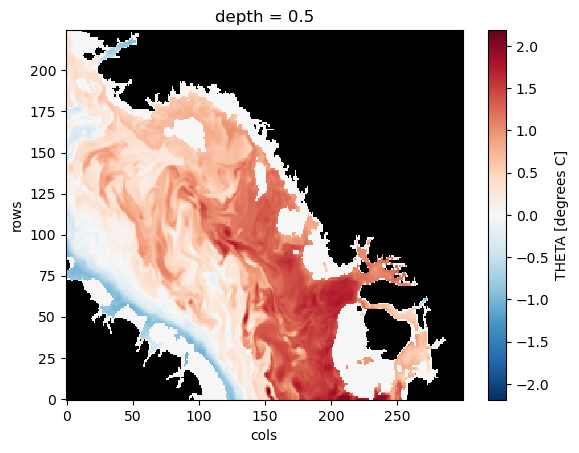

In [102]:
fig, ax1 = plt.subplots()
theta_250m.THETA.isel(time=0).plot(ax=ax1)
salt_mask.isel(depth=0,time=0).plot(ax=ax1,add_colorbar=False,cmap='Greys',vmin=-0.5,vmax=0)

ax1.set_xticklabels(theta_250m.longitude.values)

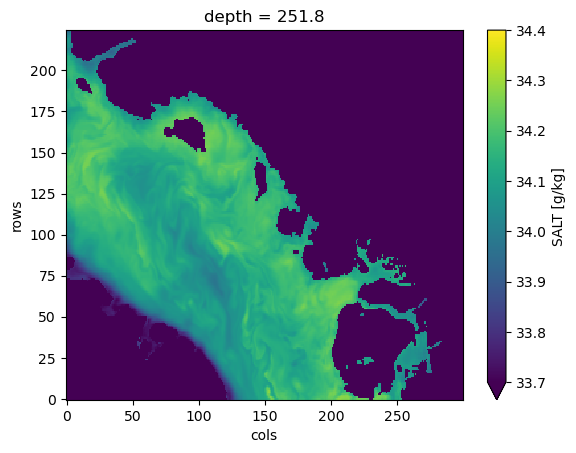

In [47]:
salt_250m.SALT.isel(time=0).plot(vmin=33.7,vmax=34.4)

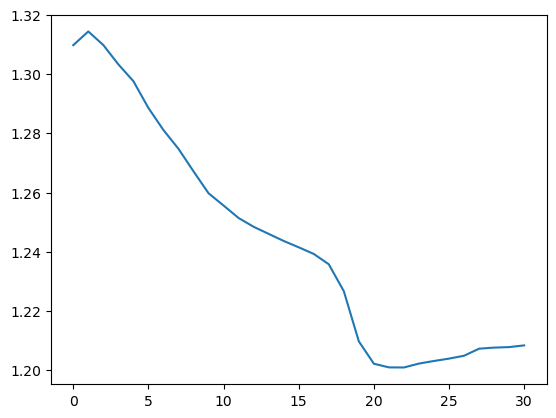

In [48]:
melville_point = theta_250m.sel(rows=125,cols=160).THETA

plt.plot(melville_point.time, melville_point.values)

In [49]:
theta_250m

<xarray.Dataset>
Dimensions:       (rows: 225, cols: 300, time: 31)
Coordinates:
    depth         float32 251.8
Dimensions without coordinates: rows, cols, time
Data variables:
    longitude     (rows, cols) float32 -77.08 -76.98 -76.88 ... -38.96 -38.87
    latitude      (rows, cols) float32 70.02 70.02 70.02 ... 73.85 73.83 73.81
    iter_numbers  (time) int64 6048720 6049440 6050160 ... 6069600 6070320
    years         (time) int32 2015 2015 2015 2015 2015 ... 2015 2015 2015 2015
    months        (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    days          (time) int32 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30 31
    THETA         (time, rows, cols) float32 ...